In [9]:
!pip install panel

  Using cached Markdown-3.3.4-py3-none-any.whl (97 kB)
  Using cached pyct-0.4.8-py2.py3-none-any.whl (15 kB)


In [23]:
!pip install WordCloud

In [15]:
import panel as pn
pn.extension('plotly')
#import plotly.express as px
import pandas as pd
#import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
import seaborn as sns
#import numpy_financial as npf
import datetime as dt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
from dotenv import load_dotenv
import os
import requests
#import alpaca_trade_api as tradeapi
from datetime import datetime, timedelta
#from newsapi.newsapi_client import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [16]:
mbti_df= pd.read_csv(Path('Resources/mbti.csv'))
mbti_df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [17]:
top1000=mbti_df.iloc[:1000]
top1000.tail()

,type,posts
995,ENFP,"As an INTJ, I have been very interested in EST..."
996,ENTP,http://i975.photobucket.com/albums/ae240/Where...
997,INFP,"'Hello, you look lovely...|||A quick recap on ..."
998,ENTJ,'I start every single phone conversation with ...
999,ISTJ,"'LOL, of course. Clearly your name is Mike, B..."


In [18]:
posts=top1000.posts

In [19]:
x=posts.str.cat(sep=' ')

In [20]:
count1=top1000.groupby(['type']).count().sort_values(by='posts', ascending=False)
#count=count.set_index('type')
count1=count1.reset_index()
#count=count.sort_values(by='posts', ascending=False)
count1

,type,posts
0,INFP,237
1,INFJ,161
2,INTP,153
3,INTJ,130
4,ENTP,72
5,ENFP,71
6,ISTP,44
7,ENTJ,29
8,ISFP,27
9,ENFJ,24


([<matplotlib.patches.Wedge at 0x207513650c8>,
 [Text(0.8089266387634285, 0.7454110900026251, 'INFP'),
  Text(-0.45266581136130274, 1.0025435966702962, 'INFJ'),
  Text(-1.0859112159200799, 0.17549025938488422, 'INTP'),
  Text(-0.8205352753312497, -0.7326130369690881, 'INTJ'),
  Text(-0.22644891882921386, -1.0764389844116016, 'ENTP'),
  Text(0.2635052742508482, -1.0679723640815737, 'ENFP'),
  Text(0.6239958063815029, -0.9058858833309515, 'ISTP'),
  Text(0.8135941712061449, -0.7403138014243598, 'ENTJ'),
  Text(0.9306077896302254, -0.586488825025291, 'ISFP'),
  Text(1.0122550138029187, -0.4305110765483891, 'ENFJ'),
  Text(1.0572819509432214, -0.30357021627573383, 'ISFJ'),
  Text(1.0791995598986321, -0.21290446194149776, 'ISTJ'),
  Text(1.0917538999748735, -0.13443742741385006, 'ESTP'),
  Text(1.0976069924850425, -0.07251820494151814, 'ESFP'),
  Text(1.0994572149607176, -0.034551880857961036, 'ESFJ'),
  Text(1.0999511453943405, -0.010367147422445681, 'ESTJ')],
 [Text(0.4412327120527792, 0.

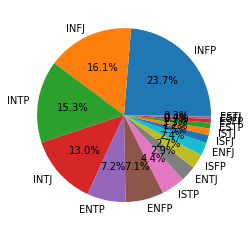

In [21]:
## Insert pie chart
y=count1.posts
labels=count1.type
plt.pie(y,labels=labels, autopct='%1.1f%%')

In [27]:
# Define the wordcloud parameters

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

lemmatizer = WordNetLemmatizer()
sw = set(stopwords.words('english','wa')) 

from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]


def tokenizer(text):
    """Tokenizes text."""
    
    # Convert the words to lowercase
    regex = re.compile("[^a-zA-Z ]")
    
    # Remove the punctuation from text
    re_clean = regex.sub('', text)

    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
       
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens

In [28]:
tokens=tokenizer(x)

In [29]:
from collections import Counter
# get word counts
word_counts = Counter(tokens)
print(dict(word_counts.most_common(20)))

{'like': 7983, 'im': 7575, 'wa': 6637, 'dont': 5998, 'think': 5864, 'people': 5233, 'know': 4362, 'one': 4336, 'really': 3924, 'would': 3885, 'thing': 3698, 'get': 3640, 'time': 3552, 'feel': 2980, 'ive': 2720, 'make': 2705, 'much': 2546, 'say': 2545, 'type': 2523, 'love': 2431}


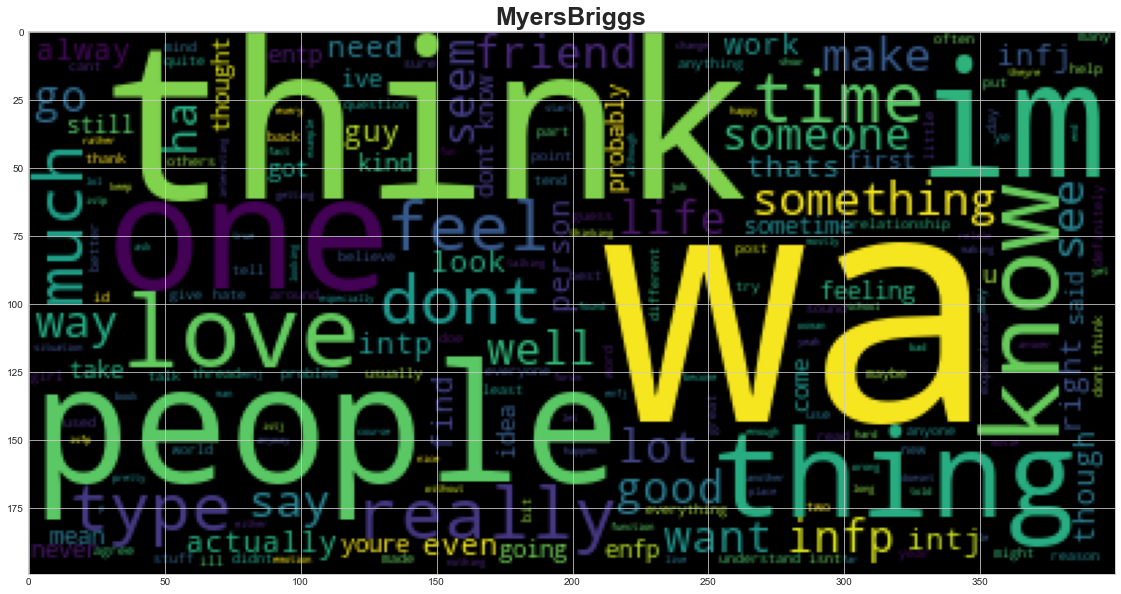

In [30]:
tokens_string = ' '.join(tokens)

wc = WordCloud().generate(tokens_string)
plt.title('MyersBriggs', fontsize=25, fontweight='bold')
plt.imshow(wc)

In [31]:
from nltk.stem import PorterStemmer

In [33]:
# Define stemmer
stemmer = PorterStemmer()
# Create list to store tokenized summary descriptions
summary = []

# Iterate over the summary data while cleaning the text, append to summary list
for i in range(0,len(top1000)):
    about = re.sub('[^a-zA-Z]', ' ', top1000['posts'][i])
    about = about.lower()
    about = about.split()
    about = [stemmer.stem(word) for word in about if not word in sw]
    about = ' '.join(about)
    summary.append(about)

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

In [50]:
# Vectorizing and transforming summary descrptions such that we able to create a frequency classifying each word
vectorizer = CountVectorizer(stop_words=("wa","english"))
X = vectorizer.fit_transform(summary)
words_list = vectorizer.get_feature_names()

In [51]:
# Getting the TF-IDF weight of words used most often for the MBTI test as DataFrame
frequentwords_df = pd.DataFrame(
    list(zip(words_list, np.ravel(X.mean(axis=0)))), columns=["Word", "TF-IDF"]
)
frequentwords_scores_df = frequentwords_df.sort_values(by=["TF-IDF"], ascending=False)
frequentwords_scores = frequentwords_df.nlargest(50, "TF-IDF")
frequentwords_scores.reset_index(inplace=True)
frequentwords_scores.head(10)

,index,Word,TF-IDF
0,13716,like,8.964
1,23986,think,6.953
2,17889,peopl,5.568
3,17027,one,4.707
4,13049,know,4.692
5,8158,feel,4.457
6,9310,get,4.382
7,19734,realli,4.076
8,26856,would,4.042
9,23983,thing,3.926
